In [1]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import io
import numpy as np
import seaborn as sns
import pandas as pd

from tensorflow.keras import datasets, layers, models

In [2]:
tf.__version__

'2.3.1'

In [3]:
%load_ext tensorboard

In [4]:
logdir='log'

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [7]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1547 - accuracy: 0.9534 - val_loss: 0.0535 - val_accuracy: 0.9823
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0477 - accuracy: 0.9853 - val_loss: 0.0387 - val_accuracy: 0.9868
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0355 - accuracy: 0.9888 - val_loss: 0.0280 - val_accuracy: 0.9920
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.0321 - val_accuracy: 0.9897
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0371 - val_accuracy: 0.9895


In [9]:
y_true=test_labels
predictions=model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)


In [10]:
y_true, y_pred

(array([7, 2, 1, ..., 4, 5, 6], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64))

In [11]:
classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

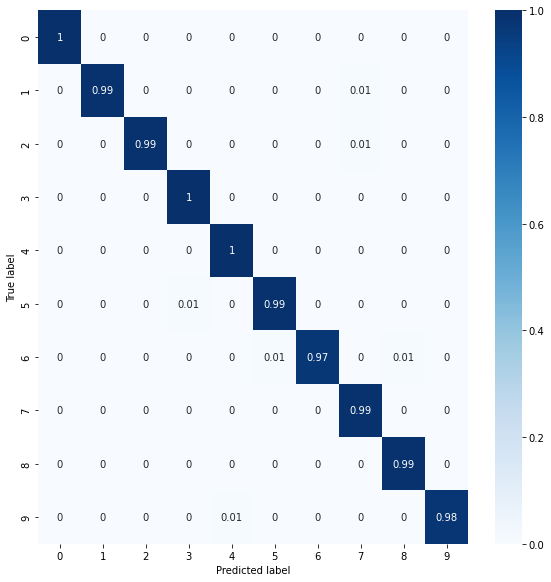

In [12]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [13]:
con_mat

array([[ 976,    0,    0,    1,    0,    0,    1,    2,    0,    0],
       [   1, 1118,    4,    4,    0,    1,    0,    7,    0,    0],
       [   1,    0, 1025,    0,    0,    0,    0,    6,    0,    0],
       [   0,    0,    1, 1005,    0,    3,    0,    0,    1,    0],
       [   0,    0,    0,    0,  981,    0,    0,    0,    0,    1],
       [   0,    0,    0,    9,    0,  881,    1,    1,    0,    0],
       [   2,    2,    4,    0,    3,    9,  931,    0,    7,    0],
       [   0,    0,    3,    2,    0,    0,    0, 1022,    0,    1],
       [   1,    0,    1,    1,    0,    2,    0,    1,  967,    1],
       [   2,    0,    0,    1,    6,    4,    0,    5,    2,  989]])

In [14]:
total = con_mat.sum()
vp = np.diag(con_mat).sum()
fp = con_mat.sum(axis=0).sum() - vp
fn = con_mat.sum(axis=1).sum() - vp
vp, fp, fn, total

(9895, 105, 105, 10000)

In [15]:
# VP, VN, FP e FN em relação especificamente à classe 0
# Necessários para o cálculo da espeficidade que, neste caso, será calculado
# apenas para a classe em questão

vp_0 = np.diag(con_mat)[0]
fp_0 = con_mat[:, 0].sum() - vp_0
fn_0 = con_mat[0, :].sum() - vp_0
vn_0 = total - (vp_0 + fp_0 + fn_0)
vp_0, vn_0, fp_0, fn_0

(976, 9013, 7, 4)

In [16]:
# Cálculo das métricas de avaliação a partir da matriz de confusão

sens = vp / (vp + fn)
espec = vn_0 / (fp_0 + vn_0)
acc = vp / total
prec = vp / (vp + fp)
f1_score = 2 * (prec  * sens) / (prec + sens)

In [17]:
print(f'Sensibilidade: {sens:.4f}')
print(f'Especificidade (classe 0): {espec:.4f}')
print(f'Acurácia: {acc:.4f}')
print(f'Precisão: {prec:.4f}')
print(f'F1-score micro: {f1_score:.4f}')

Sensibilidade: 0.9895
Especificidade (classe 0): 0.9992
Acurácia: 0.9895
Precisão: 0.9895
F1-score micro: 0.9895
